In [1]:
import pandas as pd

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

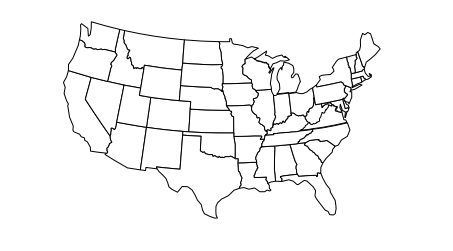

In [9]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', 
                                     category='cultural', name=shapename)
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
states = shpreader.Reader(states_shp)


for geo in states.geometries():
    ax.add_geometries([geo], ccrs.PlateCarree(), facecolor="white", edgecolor='black')


In [11]:
# data? 
df = pd.read_csv("data/NEH_Grants2010s.csv")
df.head(2)

,Unnamed: 0,AppNumber,ApplicantType,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,BeginGrant,CouncilDate,Discipline,...,ParticipantCount,PrimaryDiscipline,Program,ProjectDesc,ProjectTitle,Supplement,SupplementAmount,SupplementCount,ToSupport,YearAwarded
0,0,TD-50102-10,O,0.0,65000.0,0.0,65000.0,2010-02-01T00:00:00,2009-07-01,{'Name': 'Comparative Religion'},...,1,Comparative Religion,America's Media Makers: Development Grants,{},Mysticism and Monotheism,NaN,NaN,0,Scripting for a two-hour television broadcast ...,2010
1,1,CH-50683-10,O,300000.0,0.0,300000.0,0.0,2007-12-01T00:00:00,2009-11-01,"{'Name': 'Interdisciplinary Studies, General'}",...,1,"Interdisciplinary Studies, General",Challenge Grants,{},The Lake County Centennial Library Project Enh...,NaN,NaN,0,Funding supports construction costs for the hu...,2010


In [16]:
state_count = df.groupby("InstState").count()['Institution']

In [19]:
state_count.min()

1

NameError: name 'yr_state' is not defined

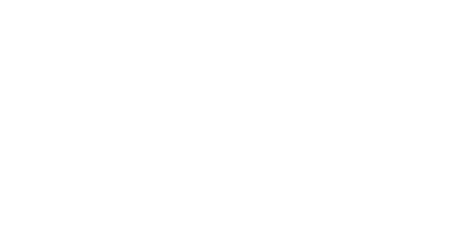

In [20]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', 
                                     category='cultural', name=shapename)
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
states = shpreader.Reader(states_shp)

colors = []
patches = []

cmap = mcm.viridis_r
norm = mcolors.Normalize(vmin=0)

for val,  state, geo in zip(state_count, states.records(), states.geometries()):
    sn = state.attributes['postal']
    color = cmap(norm(((val()
    colors.append(color) # add colors to colors list
    ax.add_geometries([geo], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = plt.colorbar(sm, ax=ax, fraction=.035, pad=.0, aspect=15, extend='both', anchor=[-5,0])
plt.show()
